<a href="https://colab.research.google.com/github/wmok12/Thesis-research-minimumwage-employment/blob/main/EDA_construction_industry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Packages and loading data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [ ]:
# Load your dataset
dataset = pd.read_csv('/content/drive/MyDrive/Thesis/Voorbereiding/dataset_cps_construction.csv')
print(dataset)

       YEAR  MONTH  AGE     SEX   RACE          MARST     EMPSTAT  \
0      2010      1   29    Male  White  Never married    Employed   
1      2010      1   55    Male   BAME  Never married  Unemployed   
2      2010      1   58    Male  White        Married    Employed   
3      2010      1   44    Male  White         Others    Employed   
4      2010      1   60    Male  White        Married  Unemployed   
...     ...    ...  ...     ...    ...            ...         ...   
30608  2022     12   46    Male  White        Married    Employed   
30609  2022     12   20    Male  White  Never married    Employed   
30610  2022     12   43  Female  White         Others    Employed   
30611  2022     12   63  Female  White        Married    Employed   
30612  2022     12   62    Male  White        Married    Employed   

             LABFORCE        CLASSWKR                 EDUC  MINIMUM WAGE  
0      In labor force  Work for wages    Bachelor's degree          7.25  
1      In labor force

In [ ]:
# Extract features in datafram
features_dataset = pd.DataFrame(dataset.columns.drop(['YEAR', 'MONTH']), columns=['Features'])

# Display table
print(features_dataset)

       Features
0           AGE
1           SEX
2          RACE
3         MARST
4       EMPSTAT
5      LABFORCE
6      CLASSWKR
7          EDUC
8  MINIMUM WAGE


# Statistics

In [ ]:
print(dataset['AGE'].describe())
print("Skewness:\n", dataset['AGE'].skew())
print("Kurtosis:\n", dataset['AGE'].kurtosis())


count    30613.00000
mean        44.42789
std         13.23867
min         15.00000
25%         34.00000
50%         44.00000
75%         54.00000
max         85.00000
Name: AGE, dtype: float64
Skewness:
 0.114363441514427
Kurtosis:
 -0.5733550534055145


In [ ]:
print(dataset['MINIMUM WAGE'].describe())
print("Skewness:\n", dataset['MINIMUM WAGE'].skew())
print("Kurtosis:\n", dataset['MINIMUM WAGE'].kurtosis())

count    30613.000000
mean         8.288682
std          0.839352
min          7.250000
25%          7.790000
50%          8.050000
75%          8.460000
max         10.000000
Name: MINIMUM WAGE, dtype: float64
Skewness:
 1.042119748537736
Kurtosis:
 0.1693255442277577


In [ ]:
# Chi squared test
def perform_chi_square(variable, target):
    contingency_table = pd.crosstab(dataset[variable], dataset[target])
    chi_squared_statistic, p_value, dof, expected = stats.chi2_contingency(contingency_table)

    print(f"\nChi-squared test for {variable} vs {target}:")
    print(f"Chi-squared statistic: {chi_squared_statistic:.2f}")
    print(f"P-value: {p_value:.4f}")
    print(f"Degrees of freedom: {dof}")

# The chi-square statistic for each categorical variable compared to the target variable
categorical_vars = ['EDUC', 'SEX', 'CLASSWKR', 'MARST', 'RACE', 'LABFORCE']

for var in categorical_vars:
    perform_chi_square(var, 'EMPSTAT')


Chi-squared test for EDUC vs EMPSTAT:
Chi-squared statistic: 285.82
P-value: 0.0000
Degrees of freedom: 15

Chi-squared test for SEX vs EMPSTAT:
Chi-squared statistic: 19.27
P-value: 0.0000
Degrees of freedom: 1

Chi-squared test for CLASSWKR vs EMPSTAT:
Chi-squared statistic: 108.18
P-value: 0.0000
Degrees of freedom: 2

Chi-squared test for MARST vs EMPSTAT:
Chi-squared statistic: 147.27
P-value: 0.0000
Degrees of freedom: 2

Chi-squared test for RACE vs EMPSTAT:
Chi-squared statistic: 165.10
P-value: 0.0000
Degrees of freedom: 2

Chi-squared test for LABFORCE vs EMPSTAT:
Chi-squared statistic: 2270.81
P-value: 0.0000
Degrees of freedom: 1


# Distribution & outliers

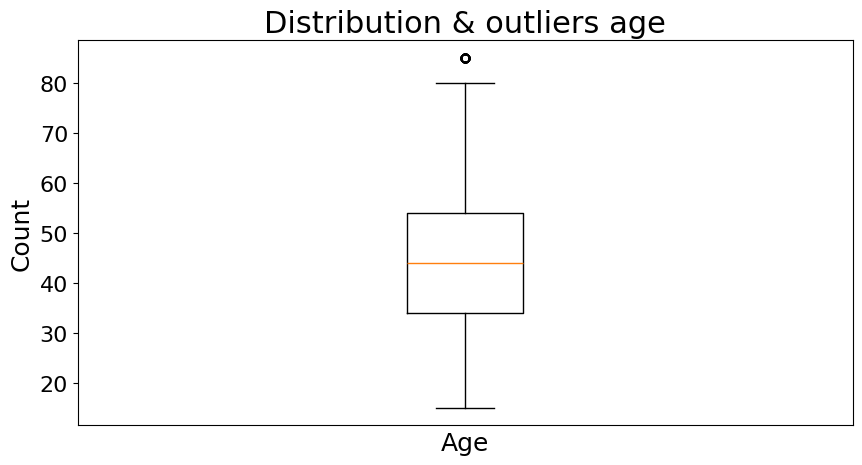

In [ ]:
# Distribution & outliers age

plt.figure(figsize=(10, 5))
plt.boxplot(dataset['AGE'])
plt.title('Distribution & outliers age', fontsize = 22)
plt.xlabel('Age', fontsize = 18)
plt.ylabel('Count', fontsize = 18)
plt.xticks([])
plt.yticks(fontsize=16)
plt.show()


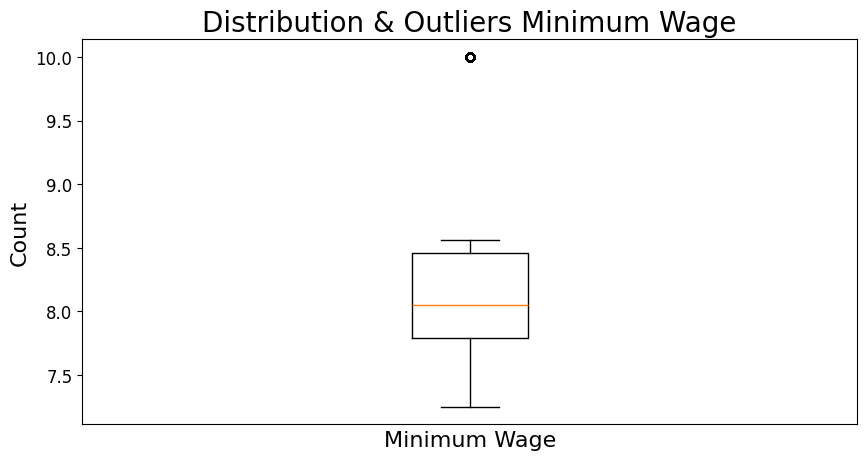

In [ ]:
# Distribution & outliers Minimum Wage

plt.figure(figsize=(10, 5))
plt.boxplot(dataset['MINIMUM WAGE'])
plt.title('Distribution & Outliers Minimum Wage', fontsize=22)
plt.xlabel('Minimum Wage', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xticks([])
plt.yticks(fontsize=16)
plt.show()


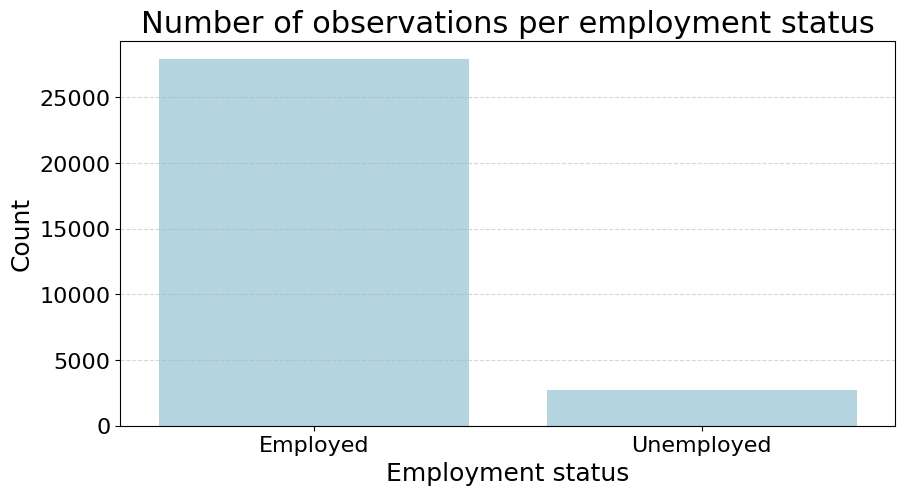

In [ ]:
# Countplot Employment status

# Plotting
plt.figure(figsize=(10, 5))
sns.countplot(data=dataset, x='EMPSTAT', color = '#ADD8E6')
plt.title('Number of observations per employment status', fontsize = 22)
plt.xlabel('Employment status', fontsize = 18)
plt.ylabel('Count', fontsize = 18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

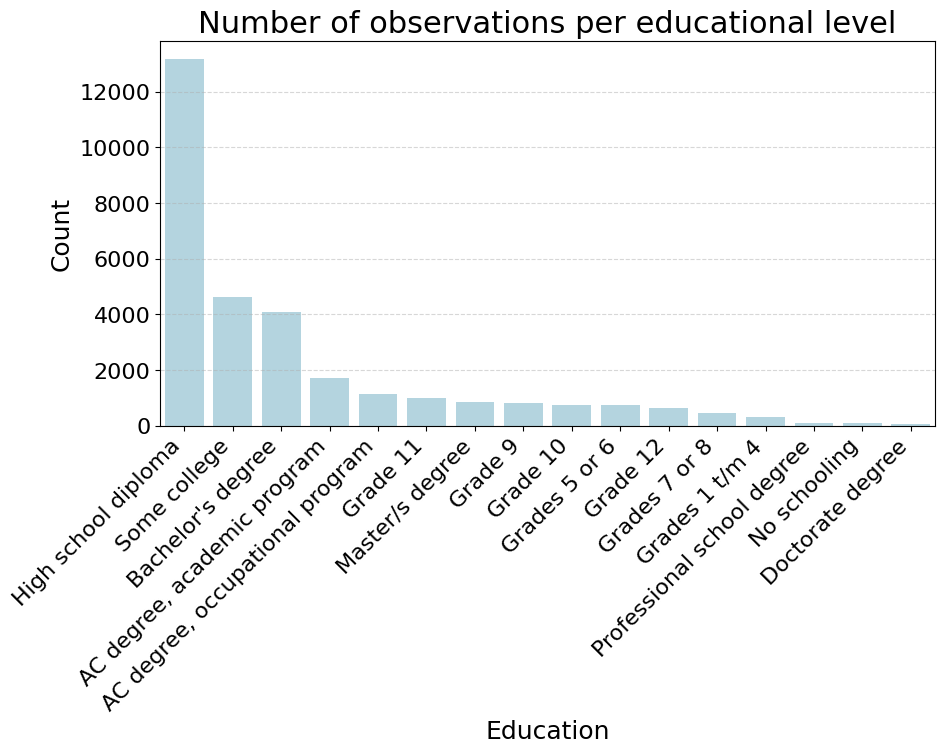

In [ ]:
# Countplot Education

# Education counts
educ_counts = dataset['EDUC'].value_counts().sort_values(ascending = False)
sorted_educ = educ_counts.index

# Plotting
plt.figure(figsize=(10, 5))
sns.countplot(data=dataset, x='EDUC', order = sorted_educ, color = '#ADD8E6')
plt.title('Number of observations per educational level', fontsize = 22)
plt.xlabel('Education', fontsize = 18)
plt.ylabel('Count', fontsize = 18)
plt.yticks(fontsize=16)
plt.xticks(rotation=45, ha = 'right', fontsize = 16)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


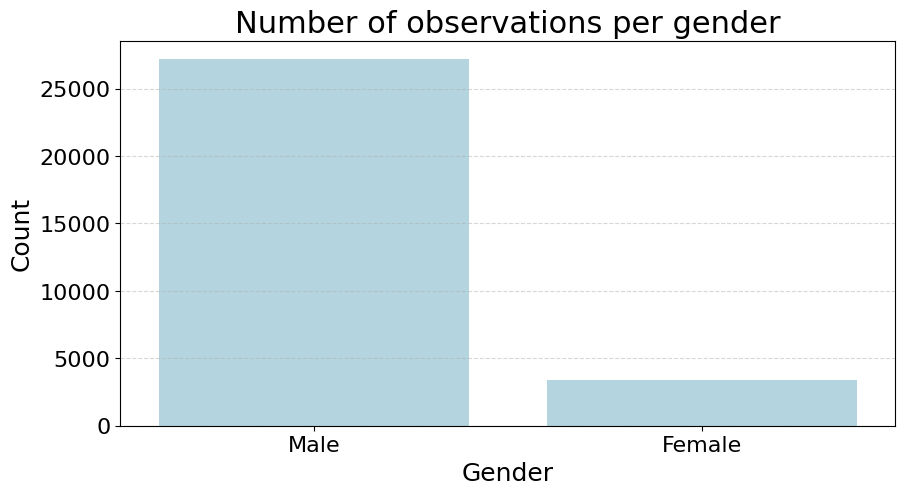

In [ ]:
# Countplot Sex

# Plotting
plt.figure(figsize=(10, 5))
sns.countplot(data=dataset, x='SEX', color = '#ADD8E6')  # Gebruik countplot voor categorische data
plt.title('Number of observations per gender', fontsize = 22)
plt.xlabel('Gender', fontsize = 18)
plt.ylabel('Count', fontsize = 18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.5)  # Voeg een grid toe
plt.show()

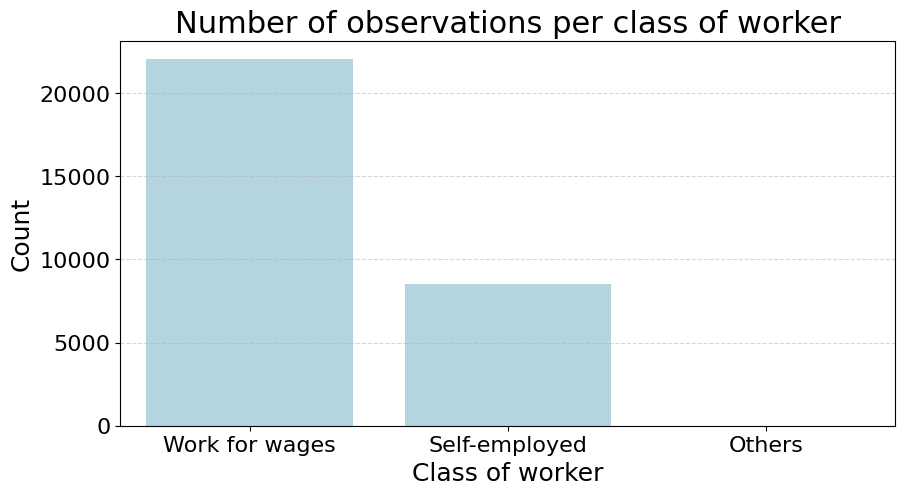

In [ ]:
# Countplot class of worker

# Plotting
plt.figure(figsize=(10, 5))
sns.countplot(data=dataset, x='CLASSWKR', color = '#ADD8E6')  # Gebruik countplot voor categorische data
plt.title('Number of observations per class of worker', fontsize = 22)
plt.xlabel('Class of worker', fontsize = 18)
plt.ylabel('Count', fontsize = 18)
plt.xticks(fontsize = 16)
plt.yticks(fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.5)  # Voeg een grid toe
plt.show()

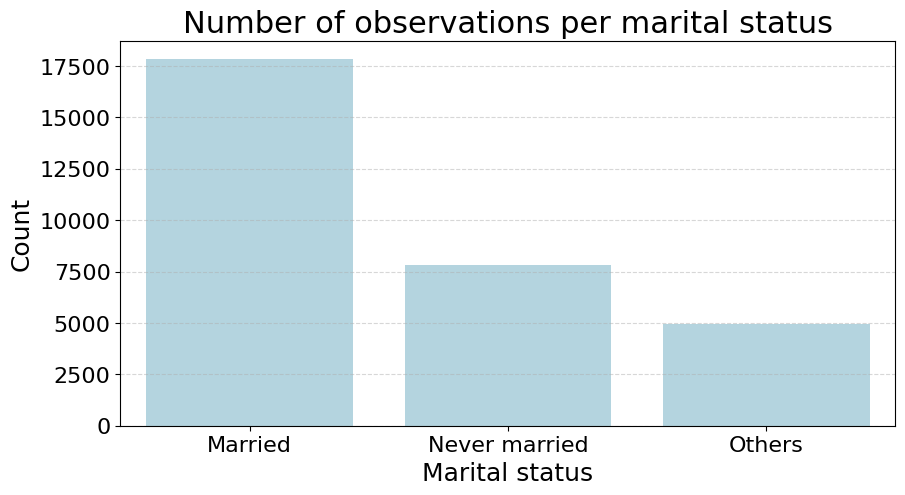

In [ ]:
# Countplot Marital Status

# Marital status counts
marst_counts = dataset['MARST'].value_counts().sort_values(ascending = False)
sorted_marst = marst_counts.index

# Plotting
plt.figure(figsize=(10, 5))
sns.countplot(data=dataset, x='MARST', order = sorted_marst, color = '#ADD8E6')  # Gebruik countplot voor categorische data
plt.title('Number of observations per marital status', fontsize = 22)
plt.xlabel('Marital status', fontsize = 18)
plt.ylabel('Count', fontsize =18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.5)  # Voeg een grid toe
plt.show()

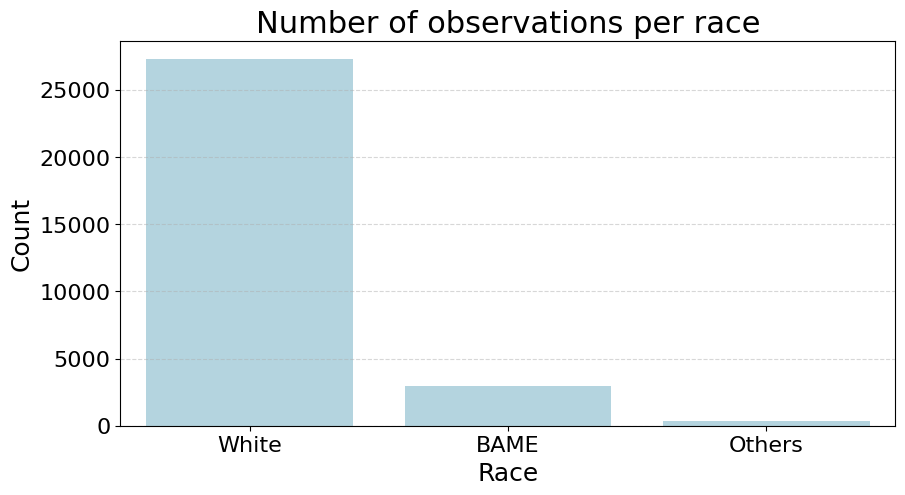

In [ ]:
# Countplot race

# Plotting
plt.figure(figsize=(10, 5))
sns.countplot(data=dataset, x='RACE', color = '#ADD8E6')  # Gebruik countplot voor categorische data
plt.title('Number of observations per race', fontsize = 22)
plt.xlabel('Race', fontsize = 18)
plt.ylabel('Count', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.5)  # Voeg een grid toe
plt.show()

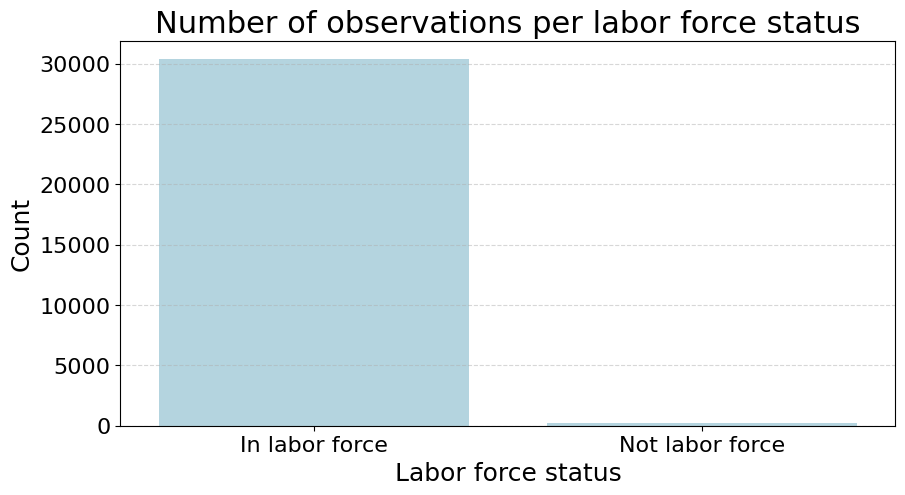

In [ ]:
# Countplot labor force status

# Plotting
plt.figure(figsize=(10, 5))
sns.countplot(data=dataset, x='LABFORCE', color = '#ADD8E6')  # Gebruik countplot voor categorische data
plt.title('Number of observations per labor force status', fontsize = 22)
plt.xlabel('Labor force status', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.5)  # Voeg een grid toe
plt.show()